# Imports

In [69]:
library(car)
library(reshape2)
library(ggplot2)

In [70]:
crime_df = read.csv('crime_v2.csv')

# Quick Data Check

In [71]:
summary(crime_df)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

In [72]:
str(crime_df)

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

In [73]:
#see if there are rows where west and central is set to 1
crime_df[crime_df$west+crime_df$central > 1,]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
33,71,87,0.0544061,0.243119,0.229589999,0.379175,11.29,0.00207028,4.834734,31.53658,...,595.3719,240.3673,348.0254,295.2301,358.95,509.43,359.11,339.58,0.1018608,0.07939028
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [74]:
head(crime_df)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,...,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,...,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,...,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,...,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,...,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,...,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


In [75]:
tail(crime_df)

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
92,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,`,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


**Findings:**
* County numbers are odds.
* there is one row where the county is both central and west.
* There are 5 blank rows at the tail.
* prbconv is reading as a factor/string, needs to be cleaned up.

# Data Clean Up

In [81]:
#removing the last 5 rows that are blank
crime_df = head(crime_df, -6)

In [82]:
#change prbconv into doubles instead of string/factors
crime_df$prbconv = as.double(as.character(crime_df$prbconv))

# Exploratory Data Analysis

**Question 1:** What do you want to measure? Make sure you identify variables that will be relevant to the concerns of the political campaign.

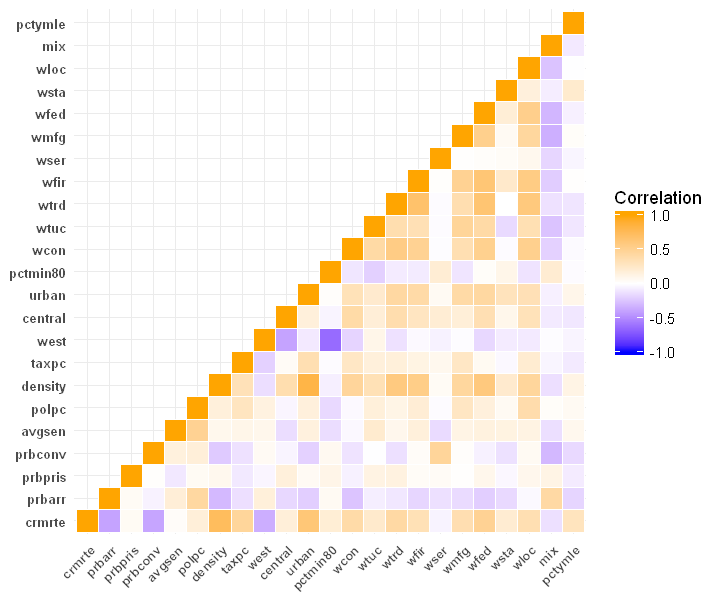

In [84]:
options(repr.plot.width=6, repr.plot.height=5)
#correlation matrix for top 4 correlation and bottom 4 correlation
cor_dr = cor(crime_df[c('crmrte',
                        'prbarr',
                        'prbpris',
                        'prbconv',
                        'avgsen',
                        'polpc',
                        'density',
                        'taxpc',
                        'west',
                        'central',
                        'urban',
                        'pctmin80',
                        'wcon',
                        'wtuc',
                        'wtrd',
                        'wfir',
                        'wser',
                        'wmfg',
                        'wfed',
                        'wsta',
                        'wloc',
                        'mix',
                        'pctymle')],
              use = "complete.obs")


# Get upper triangle of the correlation matrix
lower_tri = function(data){data[lower.tri(data)]<- NA 
                           return(data)}

# Heatmap
ggplot(data = melt(lower_tri(cor_dr), na.rm = TRUE),
       aes(Var2, Var1, fill = value))+
theme_minimal()+ 
geom_tile(color = 'white')+
scale_fill_gradient2(low = 'blue',
                     high = "orange",
                     mid = 'white', 
                     midpoint = 0,
                     limit = c(-1,1),
                     name= 'Correlation')+
theme(axis.text.x = element_text(face='bold',
                                 angle=45,
                                 vjust = 1,
                                 size =8,
                                 hjust = 1),
     axis.text.y = element_text(face='bold',
                                size=8),
     axis.title.x=element_blank(),
     axis.title.y=element_blank())

**Findings:**
* Crime rate (crmrte) seems to have the strongest correlation with density(+), prbarr(-), prbconv(-), taxpc(+), wages(+)
* Density seems to be correlated with wages (+): wcon, wtuc, wtrd, wfir ,wser, wmfg, wfed, wloc. This just implies that there are higher wages in the more dense counties.
* Probability of Arrest (prbarr) is strongly correlated with polpc(+), mix, density.
* Probability of Conviction (prbconv) is strongly correlated with wser (+), mix(-).
* Tax Revenue Per Capita is strongly correlated to density (+).

**Misc/Interesting Notes:**
* Minorities seems to be the lowest in the west.